In [1]:
import os
import glob
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------------------------------------------
model_name = "ResNet18"         # CHANGE WITH THE MODEL WHOSE RESULTS YOU WANT TO SHOW
# ------------------------------------------------------------------------------------

# Directory of the results for the current model
checkpoint_dir = f"../checkpoints/{model_name}"
checkpoint_files = sorted(glob.glob(os.path.join(checkpoint_dir, "log_epoch_*.pt")))

In [2]:
# ---------------------------------------------------------------------------
# 1. LOADING DATA
# ---------------------------------------------------------------------------

# Loading data and sorted
logs = []
for file in checkpoint_files:
    ckpt = torch.load(file, map_location="cpu")
    logs.append({
        "epoch": ckpt["epoch"] + 1,

        # ACCURACY
        "val_acc_species" : ckpt["current_acc_species"],
        "val_acc_disease" : ckpt["current_acc_disease"],
        "val_acc_avg"     : ckpt["current_acc_avg"],

        "best_val_acc_species" : ckpt["best_acc_species"],
        "best_val_acc_disease" : ckpt["best_acc_disease"],
        "best_val_acc_avg"     : ckpt["best_acc_avg"],

        # F1 MACRO
        "val_f1_species" : ckpt["current_f1_species"],
        "val_f1_disease" : ckpt["current_f1_disease"],
        "val_f1_avg"     : ckpt["current_f1_macro"],

        "best_val_f1_species" : ckpt["best_f1_species"],
        "best_val_f1_disease" : ckpt["best_f1_disease"],
        "best_val_f1_avg"     : ckpt["best_f1_macro"],

        # LOSS
        "loss_species" : ckpt["current_loss_species"],
        "loss_disease" : ckpt["current_loss_disease"],
        "loss_avg"     : ckpt["current_loss"],
    })

df = pd.DataFrame(logs).sort_values("epoch").reset_index(drop=True)

# Visualizza i dati grezzi
df.head()


/var/folders/td/v7jn9s9n1rb36krxbncpn2mr0000gn/T/ipykernel_98162/2842036475.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")


,epoch,val_acc_species,val_acc_disease,val_acc_avg,best_val_acc_species,best_val_acc_disease,best_val_acc_avg,val_f1_species,val_f1_disease,val_f1_avg,best_val_f1_species,best_val_f1_disease,best_val_f1_avg,loss_species,loss_disease,loss_avg
0,1,0.838054,0.785775,0.811914,0.838054,0.785775,0.811914,0.788832,0.708086,0.748459,0.788832,0.708086,0.748459,0.165138,0.333407,0.498545
1,2,0.955920,0.883837,0.919879,0.955920,0.883837,0.919879,0.926674,0.841308,0.883991,0.926674,0.841308,0.883991,0.068193,0.162381,0.230574
2,3,0.939949,0.890439,0.915194,0.939949,0.890439,0.915194,0.928946,0.846563,0.887754,0.928946,0.846563,0.887754,0.052267,0.123318,0.175586
3,4,0.934732,0.840928,0.887830,0.939949,0.890439,0.915194,0.922156,0.777938,0.850047,0.928946,0.846563,0.887754,0.044717,0.107705,0.152422
4,5,0.972849,0.917057,0.944953,0.972849,0.917057,0.944953,0.953373,0.891402,0.922388,0.953373,0.891402,0.922388,0.036162,0.089825,0.125987


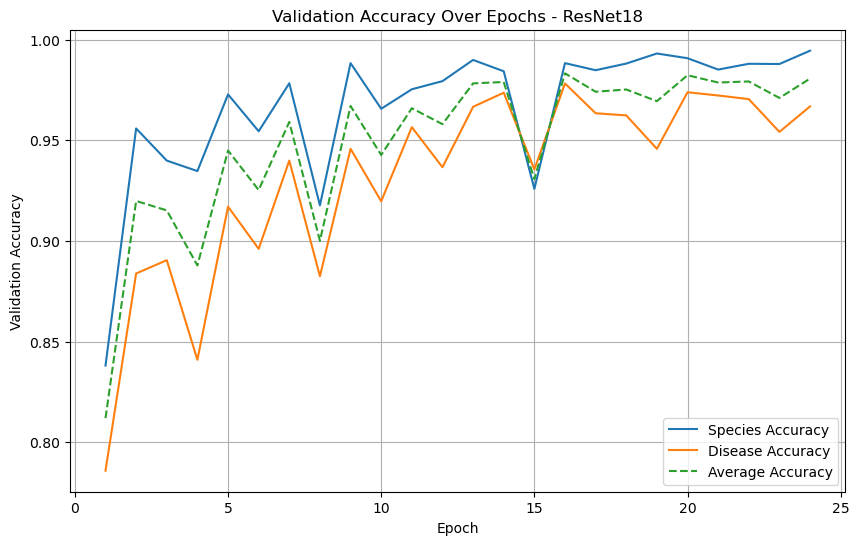

In [3]:
# ---------------------------------------------------------------------------
# 2a. ACCURACY PLOT
# ---------------------------------------------------------------------------

plt.figure(figsize=(10, 6))

plt.plot(df["epoch"], df["val_acc_species"], label="Species Accuracy")
plt.plot(df["epoch"], df["val_acc_disease"], label="Disease Accuracy")
plt.plot(df["epoch"], df["val_acc_avg"], label="Average Accuracy", linestyle='--')

plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.title(f"Validation Accuracy Over Epochs - {model_name}")
plt.legend()
plt.grid(True)

plt.show()

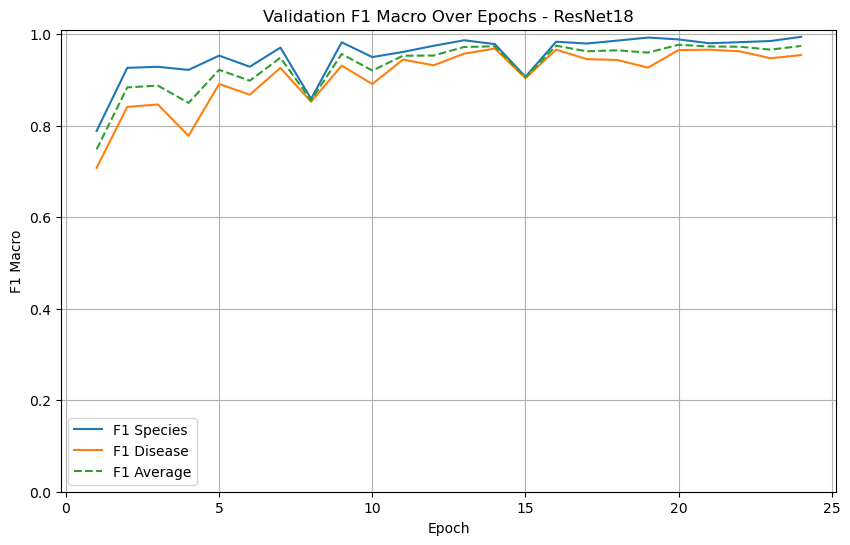

In [4]:
# ---------------------------------------------------------------------------
# 2b. F1 PLOT
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df["epoch"], df["val_f1_species"], label="F1 Species")
plt.plot(df["epoch"], df["val_f1_disease"], label="F1 Disease")
plt.plot(df["epoch"], df["val_f1_avg"], label="F1 Average", linestyle='--')

plt.xlabel("Epoch");  plt.ylabel("F1 Macro")
plt.title(f"Validation F1 Macro Over Epochs - {model_name}")
plt.ylim(0.0, 1.01)
plt.legend(); plt.grid(True); plt.show()

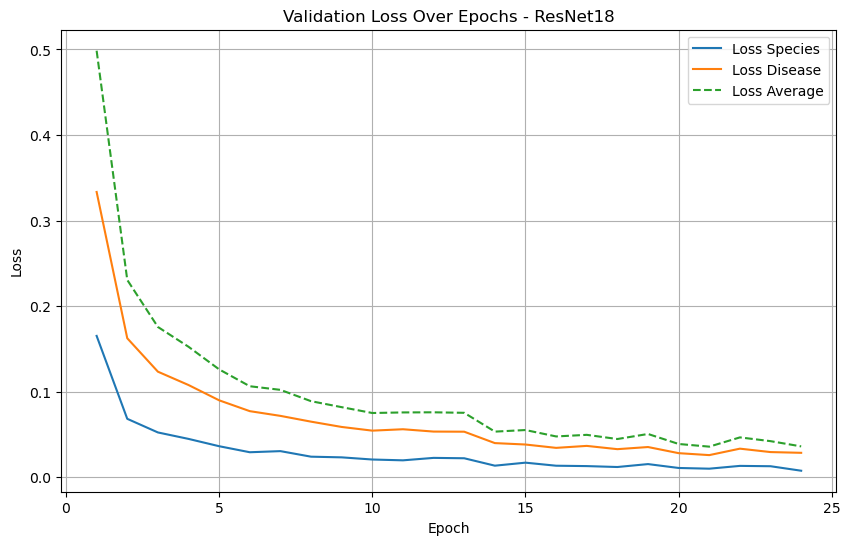

In [5]:
# ---------------------------------------------------------------------------
# 2c. LOSS PLOT
# ---------------------------------------------------------------------------
plt.figure(figsize=(10,6))
plt.plot(df["epoch"], df["loss_species"], label="Loss Species")
plt.plot(df["epoch"], df["loss_disease"], label="Loss Disease")
plt.plot(df["epoch"], df["loss_avg"], label="Loss Average", linestyle='--')

plt.xlabel("Epoch");  plt.ylabel("Loss")
plt.title(f"Validation Loss Over Epochs - {model_name}")
plt.legend(); plt.grid(True); plt.show()

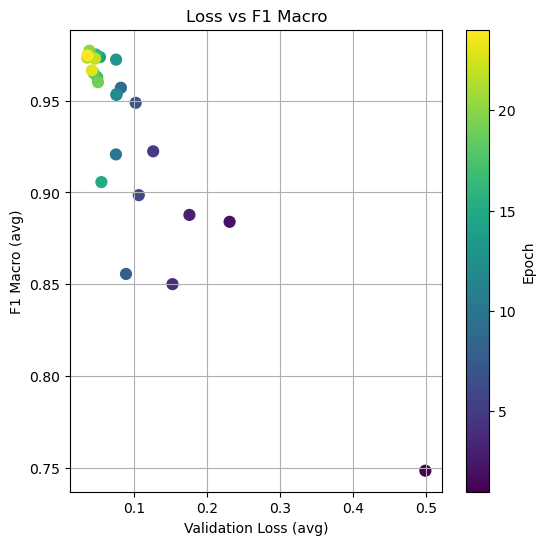

In [6]:
# ---------------------------------------------------------------------------
# BONUS CORRELAZIONE F1 vs LOSS
# ---------------------------------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(df["loss_avg"], df["val_f1_avg"], c=df["epoch"], cmap="viridis", s=60)
plt.colorbar(label="Epoch")
plt.xlabel("Validation Loss (avg)");  plt.ylabel("F1 Macro (avg)")
plt.title("Loss vs F1 Macro")
plt.grid(True); plt.show()

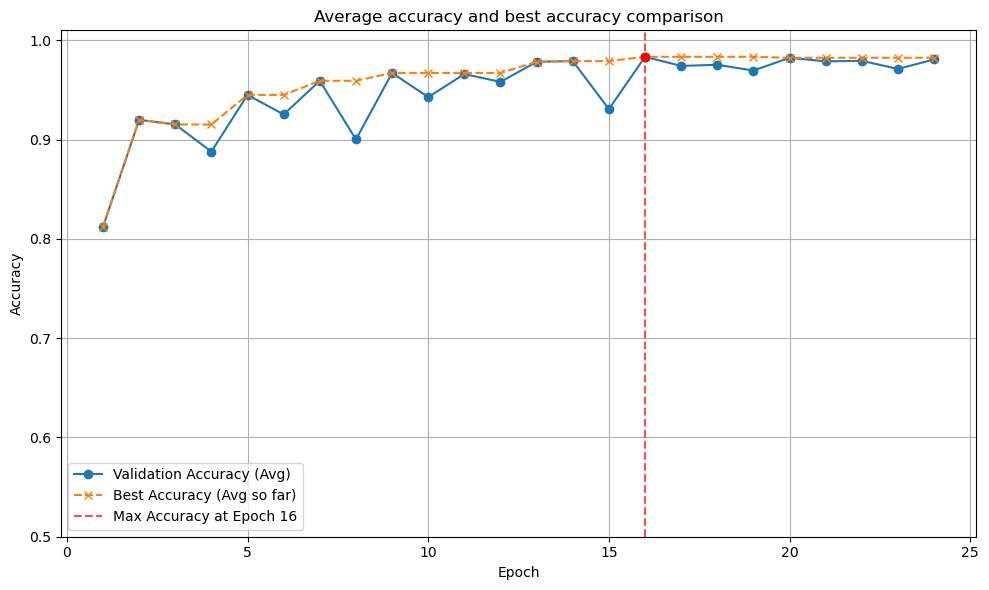

Best Accuracy Mean: 0.9833 at Epoch 16


In [7]:
# ---------------------------------------------------------------------------
# 3. AVERAGE ACCURACY AND BEST ACCURACY COMPARISON
# ---------------------------------------------------------------------------

# Find the best accuracy row
best_row = df.loc[df["best_val_acc_avg"].idxmax()]
best_epoch = best_row["epoch"]
best_acc = best_row["best_val_acc_avg"]

plt.figure(figsize=(10, 6))
plt.plot(df["epoch"], df["val_acc_avg"], label="Validation Accuracy (Avg)", marker='o')
plt.plot(df["epoch"], df["best_val_acc_avg"], label="Best Accuracy (Avg so far)", linestyle='--', marker='x')

# Mark the maximum point
plt.axvline(x=best_epoch, color='red', linestyle='--', alpha=0.7, label=f"Max Accuracy at Epoch {int(best_epoch)}")
plt.scatter(best_epoch, best_acc, color='red', zorder=5)

plt.title("Average accuracy and best accuracy comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1.01)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Best Accuracy Mean: {best_acc:.4f} at Epoch {int(best_epoch)}")

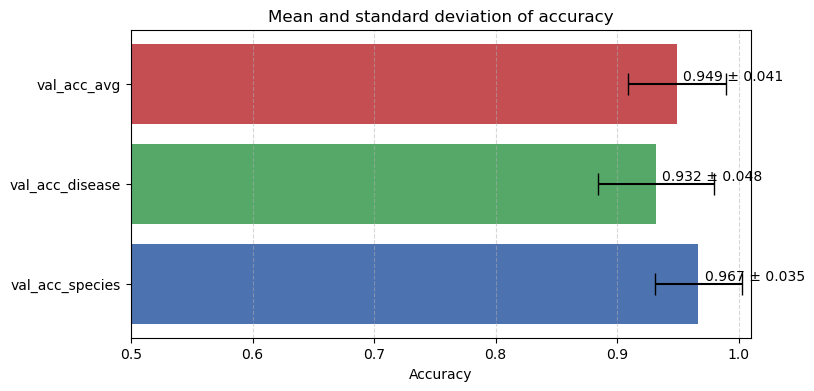

In [8]:
# ---------------------------------------------------------------------------
# 4a. MEAN and STD Accuracy
# ---------------------------------------------------------------------------

metrics = ["val_acc_species", "val_acc_disease", "val_acc_avg"]
means = [df[m].mean() for m in metrics]
stds = [df[m].std() for m in metrics]

plt.figure(figsize=(8, 4))
plt.barh(metrics, means, xerr=stds, color=["#4c72b0", "#55a868", "#c44e52"], capsize=8)
plt.xlabel("Accuracy")
plt.title("Mean and standard deviation of accuracy")
plt.xlim(0.5, 1.01)
plt.grid(axis='x', linestyle='--', alpha=0.5)

for i, (m, s) in enumerate(zip(means, stds)):
    plt.text(m + 0.005, i, f"{m:.3f} ± {s:.3f}", va="bottom")

plt.show()

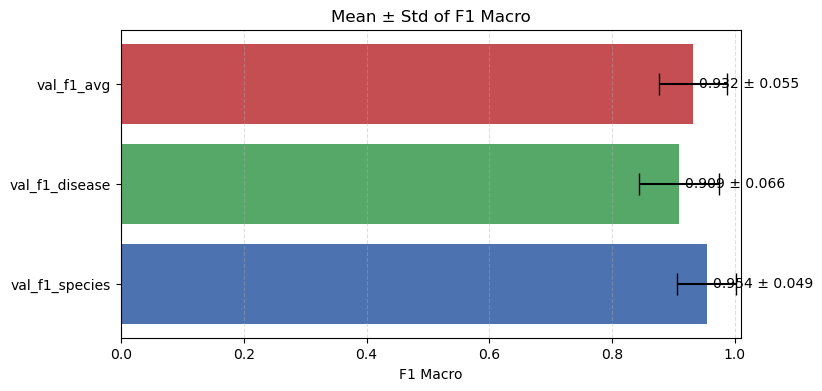

In [9]:
# ---------------------------------------------------------------------------
# 4b. MEAN & STD F1
# ---------------------------------------------------------------------------
metrics_f1 = ["val_f1_species", "val_f1_disease", "val_f1_avg"]
means_f1   = [df[m].mean() for m in metrics_f1]
stds_f1    = [df[m].std()  for m in metrics_f1]

plt.figure(figsize=(8,4))
plt.barh(metrics_f1, means_f1, xerr=stds_f1,
         color=["#4c72b0","#55a868","#c44e52"], capsize=8)
plt.xlabel("F1 Macro"); plt.title("Mean ± Std of F1 Macro")
plt.xlim(0.0, 1.01); plt.grid(axis='x', linestyle='--', alpha=.4)

for i,(m,s) in enumerate(zip(means_f1,stds_f1)):
    plt.text(m+0.01, i, f"{m:.3f} ± {s:.3f}", va="center")
plt.show()

Average improvement over epochs: 0.0073
Standard deviation: 0.0376


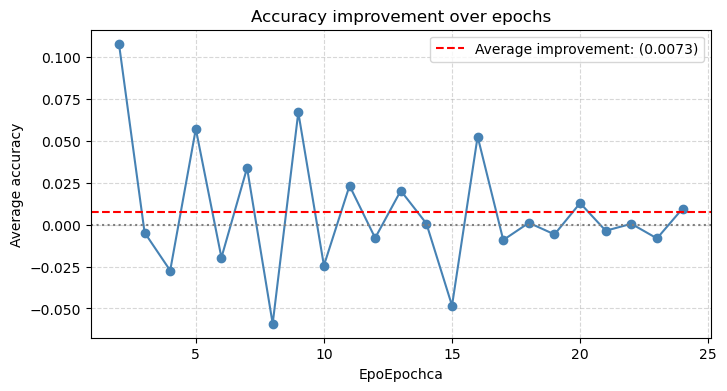

In [10]:
# ---------------------------------------------------------------------------
# 5a. ACCURACY IMPROVEMENT OVER EPOCHS
# ---------------------------------------------------------------------------

# Calcolo del miglioramento epoca per epoca
df["delta_avg_acc"] = df["val_acc_avg"].diff()  # differenza con epoca precedente

# Rimuove la prima riga (che ha NaN come differenza)
delta_df = df.dropna(subset=["delta_avg_acc"])

# Statistiche descrittive
mean_improvement = delta_df["delta_avg_acc"].mean()
std_improvement = delta_df["delta_avg_acc"].std()

print(f"Average improvement over epochs: {mean_improvement:.4f}")
print(f"Standard deviation: {std_improvement:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(delta_df["epoch"], delta_df["delta_avg_acc"], marker="o", linestyle="-", color="steelblue")
plt.axhline(mean_improvement, color="red", linestyle="--", label=f"Average improvement: ({mean_improvement:.4f})")
plt.axhline(0, color="gray", linestyle=":")
plt.title("Accuracy improvement over epochs")
plt.xlabel("EpoEpochca")
plt.ylabel("Average accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

Average F1 improvement: 0.0098  (std 0.0512)


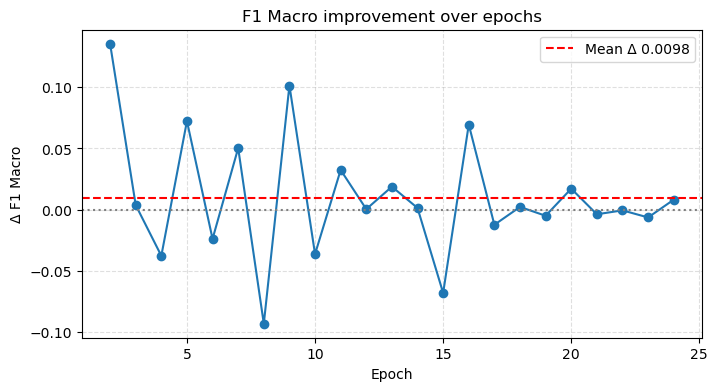

In [11]:
# ---------------------------------------------------------------------------
# 5b. F1 MACRO IMPROVEMENT OVER EPOCHS
# ---------------------------------------------------------------------------
df["delta_f1_avg"] = df["val_f1_avg"].diff()
delta_f1_df = df.dropna(subset=["delta_f1_avg"])

mean_imp = delta_f1_df["delta_f1_avg"].mean()
std_imp  = delta_f1_df["delta_f1_avg"].std()

print(f"Average F1 improvement: {mean_imp:.4f}  (std {std_imp:.4f})")

plt.figure(figsize=(8,4))
plt.plot(delta_f1_df["epoch"], delta_f1_df["delta_f1_avg"], marker="o")
plt.axhline(mean_imp, color="red", linestyle="--", label=f"Mean Δ {mean_imp:.4f}")
plt.axhline(0, color="gray", linestyle=":")
plt.title("F1 Macro improvement over epochs")
plt.xlabel("Epoch"); plt.ylabel("Δ F1 Macro")
plt.legend(); plt.grid(True, linestyle="--", alpha=.4); plt.show()

In [13]:
# ---------------------------------------------------------------------------
# 6. COMPARISON BETWEEN ALL MODELS - LOAD
# ---------------------------------------------------------------------------

model_names = ["ResNet18","ViT","CLIPResNet","CLIPViT","DINOv2"]
all_logs = []

for mdl in model_names:
    ckpt_dir = f"../checkpoints/{mdl}"
    files = sorted(glob.glob(os.path.join(ckpt_dir, "log_epoch_*.pt")))
    for f in files:
        ck = torch.load(f, map_location="cpu")
        all_logs.append({
            "model"   : mdl,
            "epoch"   : ck["epoch"]+1,
            "val_f1_avg" : ck["current_f1_macro"],
            "loss_avg"   : ck["current_loss"],
            "val_acc_avg": ck["current_acc_avg"]
        })

df_all = pd.DataFrame(all_logs).sort_values(["model","epoch"]).reset_index(drop=True)

/var/folders/td/v7jn9s9n1rb36krxbncpn2mr0000gn/T/ipykernel_98162/3489208471.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ck = torch.load(f, map_location="cpu")


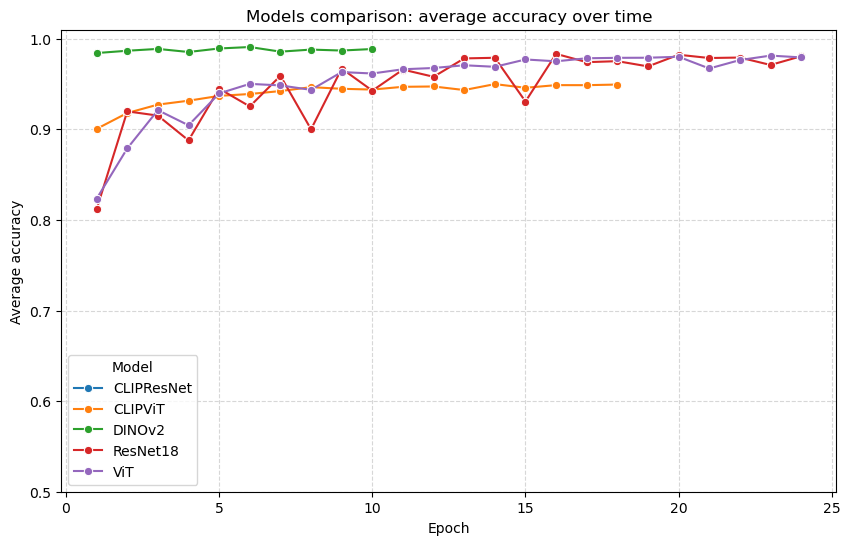

In [14]:
# ---------------------------------------------------------------------------
# 7a. COMPARISON BETWEEN ALL MODELS - PLOT Accuracy
# ---------------------------------------------------------------------------

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_all, x="epoch", y="val_acc_avg", hue="model", marker="o")
plt.title("Models comparison: average accuracy over time")
plt.xlabel("Epoch")
plt.ylabel("Average accuracy")
plt.ylim(0.5, 1.01)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.show()

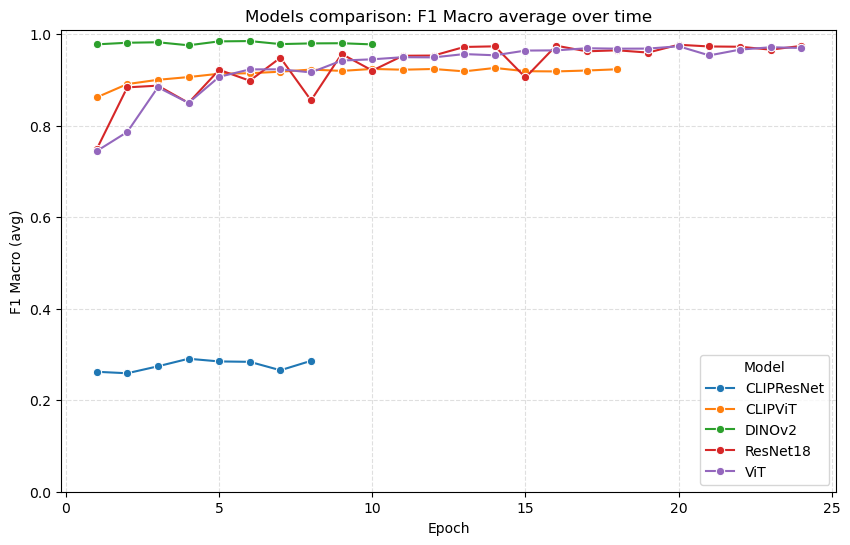

In [15]:
# ---------------------------------------------------------------------------
# 7b. COMPARISON BETWEEN ALL MODELS – PLOT F1
# ---------------------------------------------------------------------------
import seaborn as sns

plt.figure(figsize=(10,6))
sns.lineplot(data=df_all, x="epoch", y="val_f1_avg", hue="model", marker="o")
plt.title("Models comparison: F1 Macro average over time")
plt.xlabel("Epoch"); plt.ylabel("F1 Macro (avg)")
plt.ylim(0.0, 1.01); plt.grid(True, linestyle="--", alpha=.4); plt.legend(title="Model")
plt.show()

In [17]:
# ---------------------------------------------------------------------------
# 8a. SUMMARY FOR ALL MODELS Accuracy
# ---------------------------------------------------------------------------

summary = df_all.groupby("model")["val_acc_avg"].agg(["max", "mean", "std"]).sort_values("max", ascending=False)
summary.rename(columns={"max": "Max Accuracy", "mean": "Mean Accuracy", "std": "Std Dev"}, inplace=True)
summary

,Max Accuracy,Mean Accuracy,Std Dev
model,,,
DINOv2,0.990897,0.987505,0.002027
ResNet18,0.983337,0.949201,0.040523
ViT,0.981420,0.953442,0.037964
CLIPViT,0.949957,0.939553,0.012959
CLIPResNet,0.486052,0.450363,0.016523


In [18]:
# ---------------------------------------------------------------------------
# 8b. SUMMARY FOR ALL MODELS F1
# ---------------------------------------------------------------------------
summary_f1 = (df_all.groupby("model")["val_f1_avg"]
              .agg(["max","mean","std"])
              .sort_values("max", ascending=False)
              .rename(columns={"max":"Max F1","mean":"Mean F1","std":"Std F1"}))
summary_f1

,Max F1,Mean F1,Std F1
model,,,
DINOv2,0.985181,0.980483,0.003001
ResNet18,0.977156,0.931618,0.055486
ViT,0.973868,0.929413,0.059288
CLIPViT,0.926426,0.913832,0.015795
CLIPResNet,0.290696,0.275824,0.012264
